##**[1] 데이터 불러오기**

1.1 파일 업로드하기

In [1]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database (1).csv


1.2 데이터프레임 생성하기

In [2]:
import pandas as pd
df = pd.read_csv('/content/database.csv')

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## **[2] 탐색적 데이터 분석 및 전처리하기**

2.1 전체적인 데이터 살펴보기

In [4]:
df.shape

(23412, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

2.2 결측치 확인하기

In [6]:
df.isnull()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
23409,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
23410,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

2.3 Type 속성 확인하기

In [8]:
df['Type'].value_counts()

Type
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

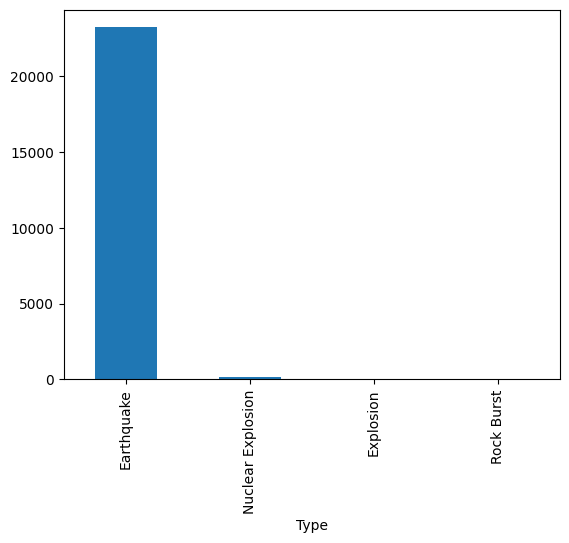

In [9]:
import matplotlib.pyplot as plt
df['Type'].value_counts().plot(kind='bar')
plt.show()

2.4 지도 데이터 시각화하기

In [10]:
import folium
m = folium.Map(location=(0, 0), zoom_start=2)
m

In [11]:
for i in range(len(df)):
    folium.Circle(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=10,
    ).add_to(m)
m


Output hidden; open in https://colab.research.google.com to view.

## **[3] 모델 생성하기**

3.1 k-평균 알고리즘으로 데이터 학습하기

In [12]:
earthquake = (df.Type=="Earthquake")
X = df.loc[earthquake, ['Depth', 'Magnitude', 'Latitude', 'Longitude']]
print(X)

        Depth  Magnitude  Latitude  Longitude
0      131.60        6.0   19.2460   145.6160
1       80.00        5.8    1.8630   127.3520
2       20.00        6.2  -20.5790  -173.9720
3       15.00        5.8  -59.0760   -23.5570
4       15.00        5.8   11.9380   126.4270
...       ...        ...       ...        ...
23407   12.30        5.6   38.3917  -118.8941
23408    8.80        5.5   38.3777  -118.8957
23409   10.00        5.9   36.9179   140.4262
23410   79.00        6.3   -9.0283   118.6639
23411   11.94        5.5   37.3973   141.4103

[23232 rows x 4 columns]


In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_km = km.fit_predict(X[['Depth', 'Magnitude']])
print(y_km[:10])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 0 0 0 0 0 2 1]


3.2 k-평균 군집화 결과 시각화하기

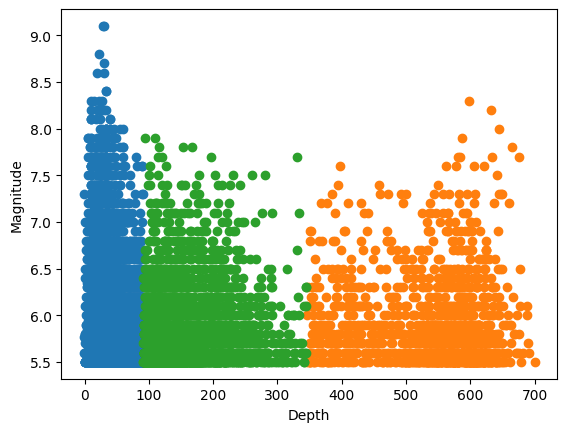

In [14]:

plt.scatter(X[y_km==0]['Depth'], X[y_km==0]['Magnitude'])
plt.scatter(X[y_km==1]['Depth'], X[y_km==1]['Magnitude'])
plt.scatter(X[y_km==2]['Depth'], X[y_km==2]['Magnitude'])
plt.xlabel('Depth')
plt.ylabel('Magnitude')

plt.show()


In [15]:
mm = folium.Map(location=(0, 0), zoom_start=2)
colors = ['red', 'blue', 'green']

for i in range(3):
    latitudeT =  X[y_km==i]['Latitude']
    longitudeT = X[y_km==i]['Longitude']

    for latitude, longitude in zip(latitudeT, longitudeT) :
        folium.Circle(
            location=[latitude, longitude],
            radius=10,
            color = colors[i]
        ).add_to(mm)

mm

Output hidden; open in https://colab.research.google.com to view.

## **[4] 모델 평가하기**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

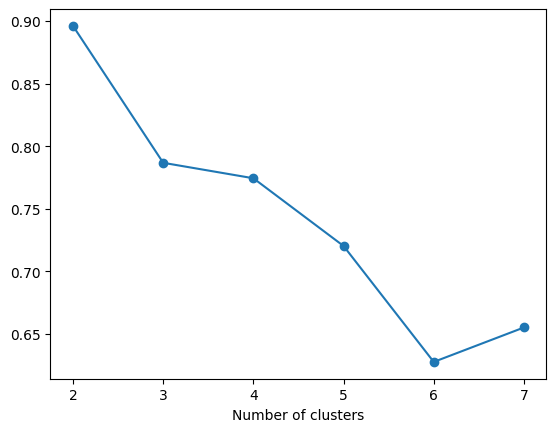

In [16]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2, 8):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X[['Depth', 'Magnitude']])
    score = silhouette_score(X[['Depth', 'Magnitude']], km.labels_)
    scores.append(score)

plt.plot(range(2, 8), scores, marker='o')
plt.xlabel('Number of clusters')
plt.show()